In [308]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [309]:
df=pd.read_csv("Census_income.csv")

In [310]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [311]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [312]:
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [313]:
def label_fix(label):
    if label==' <=50K':
        return 1
    else:
        return 0

In [314]:
df['Income'] = df['Income'].apply(label_fix)

In [315]:
df["Income"].value_counts()

1    24719
0     7841
Name: Income, dtype: int64

In [316]:
#changed the output column income to int datatype

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [318]:
df.shape

(32560, 15)

In [319]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [320]:
#there is no null values in the dataset

In [321]:
column=df.columns

for i in df[column]:
    print(df[i].unique())
    print(df[i].value_counts())

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
[ 83311 215646 234721 ...  34066  84661 257302]
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int

In [322]:
df["Workclass"].unique()
   

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [323]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

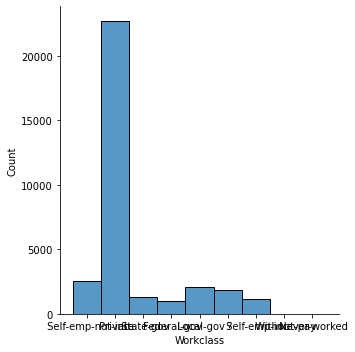

In [324]:
sns.displot(df["Workclass"])

In [325]:
#AS THE GRAPH IS SKEWED SO WE WILL USE MODE

In [326]:
#df["a"]=df["Workclass"]

In [327]:
#df["a"]

In [328]:
#df["a"].value_counts()

In [329]:
#df["a"]=df["a"].replace("?",Private")

In [330]:
#df["Workclass"]=df["Workclass"].replace("?","Private")

In [331]:
#df["Workclass"].value_counts()
#df_rep = df.replace({"Workclass": "?"}, "Private")

In [332]:
#df_rep = df["Workclass"].replace(to_replace='?', value='Private', regex=True)

In [333]:
#df["Workclass"].value_counts()

In [334]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [335]:
df["Education"].value_counts()


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [336]:
from sklearn.preprocessing import LabelEncoder

In [337]:
LE = LabelEncoder()
df["Education"]=LE.fit_transform(df["Education"])

In [338]:
df["Education"].value_counts()

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

In [339]:
df["Marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [340]:
df["Relationship"].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [341]:
df["Race"].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [342]:
df["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [343]:
df["Marital_status"]=LE.fit_transform(df["Marital_status"])
df["Relationship"]=LE.fit_transform(df["Relationship"])

In [344]:
df["Race"]=LE.fit_transform(df["Race"])
df["Sex"]=LE.fit_transform(df["Sex"])

In [345]:
df["Marital_status"].value_counts()

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64

In [346]:
df["Relationship"].value_counts()

0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64

In [347]:
df["Race"].value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64

In [348]:
df["Sex"].value_counts()

1    21789
0    10771
Name: Sex, dtype: int64

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  int32 
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  int32 
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  int32 
 8   Race            32560 non-null  int32 
 9   Sex             32560 non-null  int32 
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int32(5), int64(7), object(3)
memory usage: 3.1+ MB


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  int32 
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  int32 
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  int32 
 8   Race            32560 non-null  int32 
 9   Sex             32560 non-null  int32 
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int32(5), int64(7), object(3)
memory usage: 3.1+ MB


In [351]:
#df_main=df.replace(['?'],np.nan)

In [352]:
#df_main.head()

In [353]:
#df_main.isnull().sum()

In [354]:
#df_main["Workclass"].value_counts()

In [355]:
#df_main["Occupation"].value_counts()

In [356]:
#df_main["Native_country"].value_counts()

In [357]:
#df_main["Workclass"]=df_main["Workclass"].fillna("Private")
#df_main["Occupation"]=df_main["Occupation"].fillna("Prof-specialty")
#df_main["Native_country"]=df_main["Native_country"].fillna("United-States")

In [358]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [359]:
df['Native_country']=df['Native_country'].str.strip().replace('?','United-States')

In [360]:
df['Native_country'].value_counts()

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [361]:
df['Workclass']=df['Workclass'].str.strip().replace('?','Private')
df['Occupation']=df['Occupation'].str.strip().replace('?','Prof-specialty')

In [362]:
df['Workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [363]:
df['Occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  int32 
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  int32 
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  int32 
 8   Race            32560 non-null  int32 
 9   Sex             32560 non-null  int32 
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int32(5), int64(7), object(3)
memory usage: 3.1+ MB


In [365]:
df["Occupation"]=LE.fit_transform(df["Occupation"])
df["Workclass"]=LE.fit_transform(df["Workclass"])
df["Native_country"]=LE.fit_transform(df["Native_country"])

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.7 MB


In [367]:
#now the data is in int type

In [368]:
#univariate analysis

In [369]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

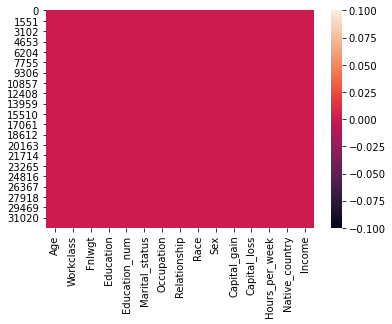

In [370]:
sns.heatmap(df.isnull())

In [371]:
#no null values in the dataset shown with the values and graph

In [372]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,1.897818e+05,10.298249,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.759183
std,13.640642,1.107094,1.055498e+05,3.870317,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,1.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,1.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,1.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


<AxesSubplot:xlabel='Income', ylabel='count'>

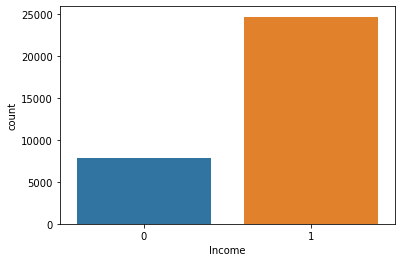

In [373]:
sns.countplot(df["Income"])

In [374]:
#not treating this as class imbalance problem as there is sufficient data

<AxesSubplot:>

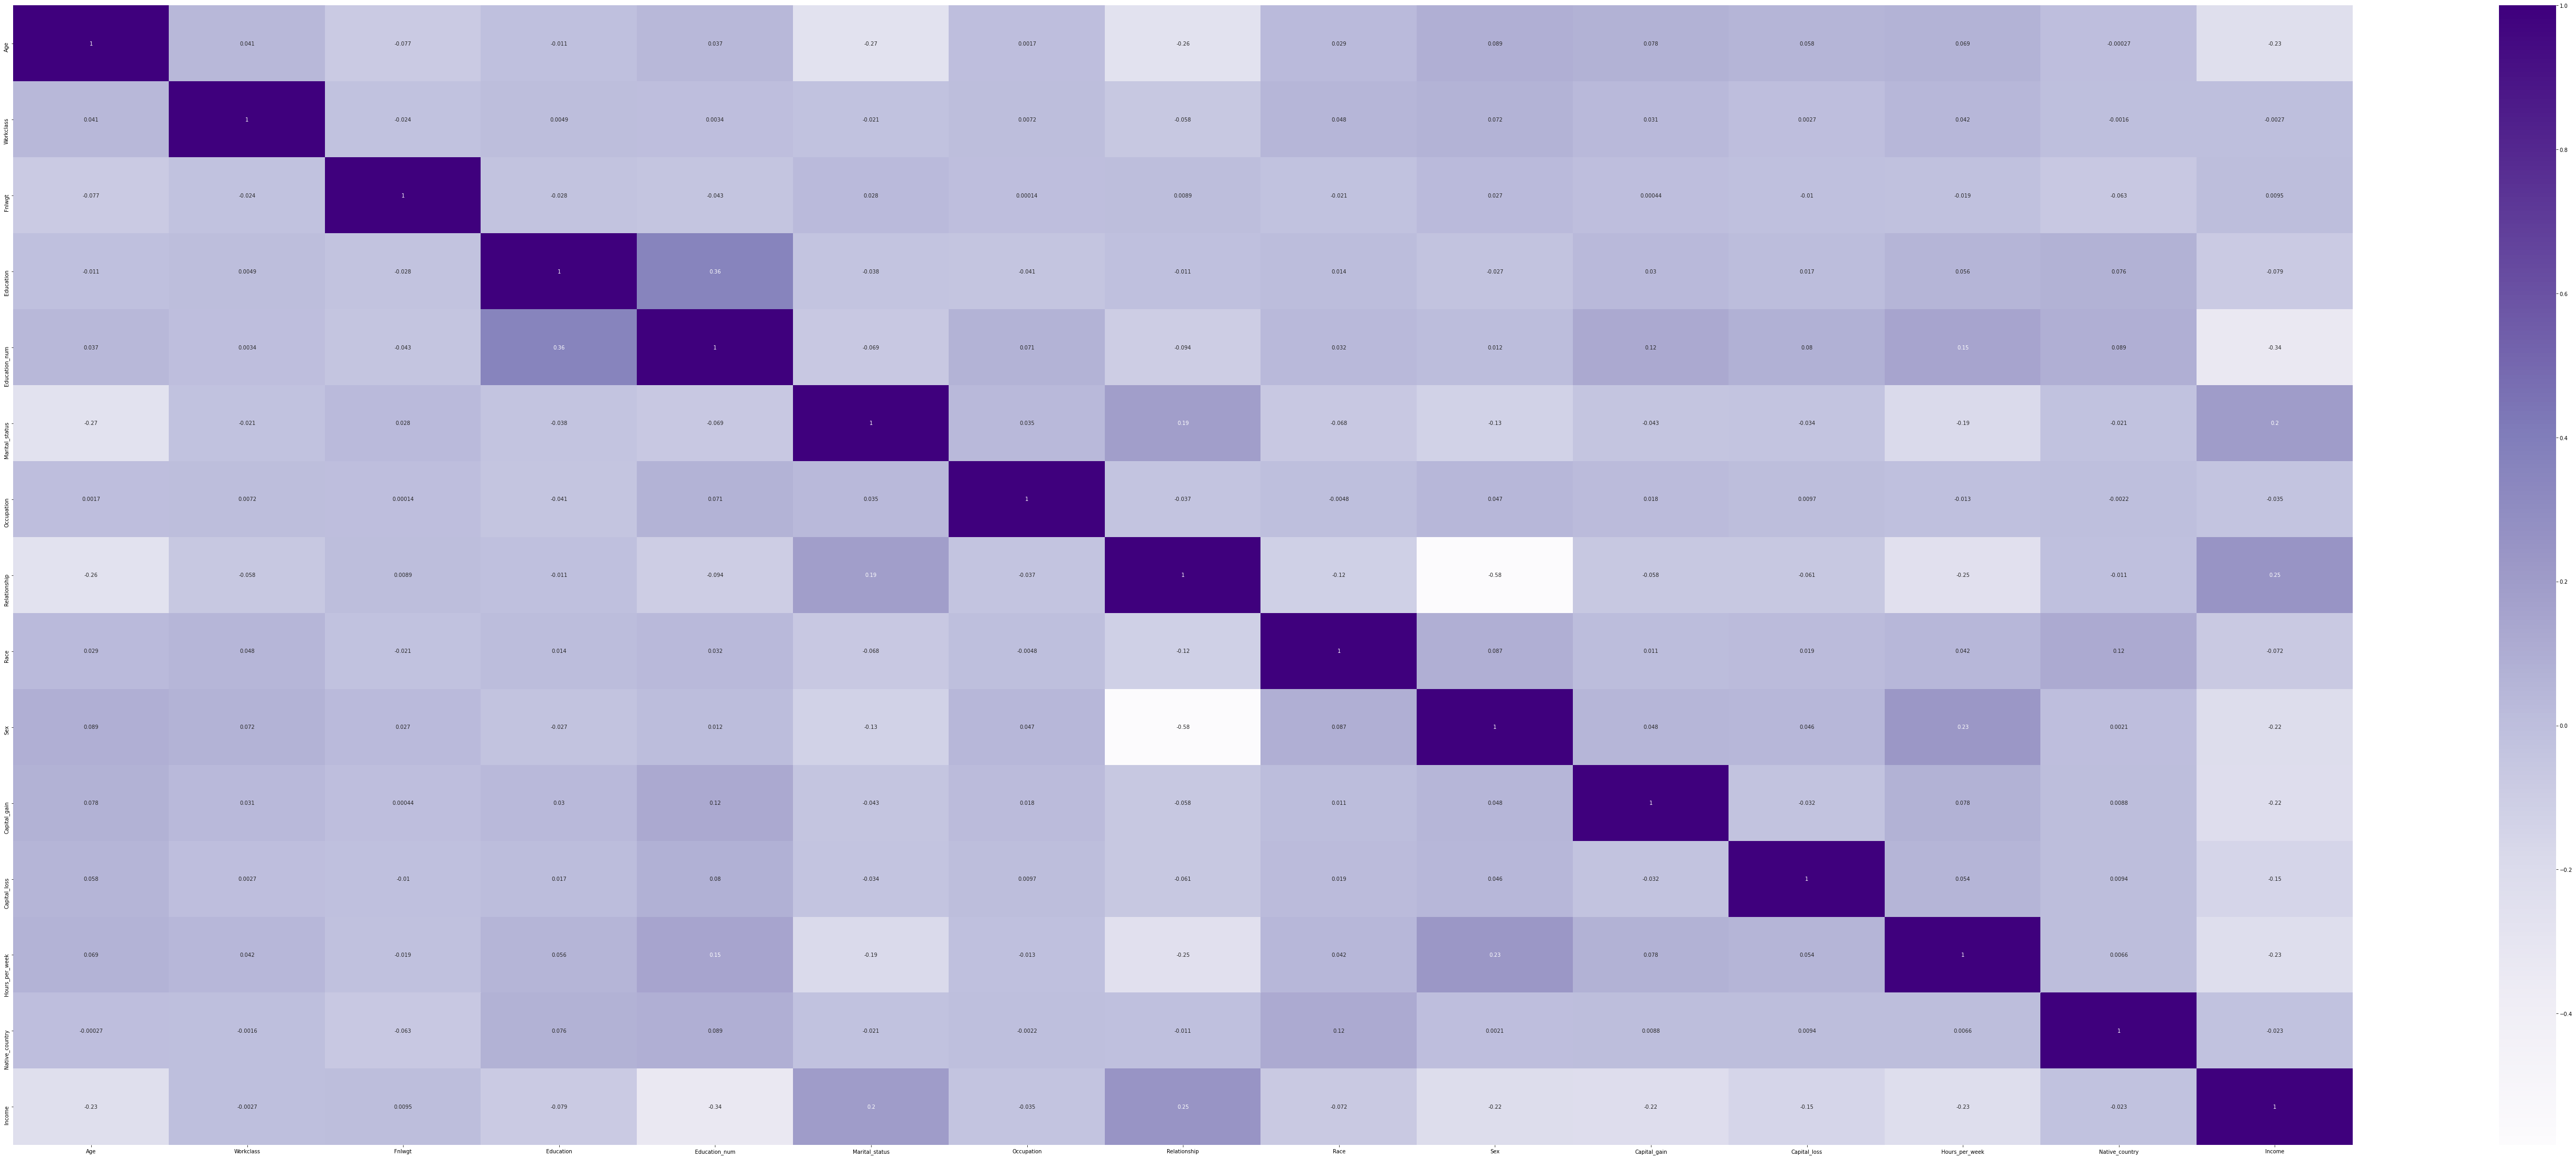

In [375]:
fig=plt.figure(figsize=(100,40))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Purples")

In [376]:
df_corrr=df.corr()

In [377]:
df_corrr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,-0.234039
Workclass,0.040506,1.000000,-0.024255,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,-0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.028156,-0.043159,0.028184,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,0.009481
Education,-0.010508,0.004901,-0.028156,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.076062,-0.079311
Education_num,0.036527,0.003445,-0.043159,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,-0.335182
Marital_status,-0.266292,-0.020545,0.028184,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.021285,0.199295
Occupation,0.001740,0.007236,0.000138,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,-0.034599
Relationship,-0.263698,-0.057931,0.008922,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,0.250924
Race,0.028718,0.048323,-0.021278,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,-0.071853
Sex,0.088832,0.071535,0.026882,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,-0.215995


<Figure size 432x288 with 0 Axes>

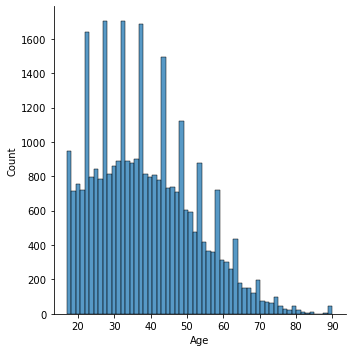

<Figure size 432x288 with 0 Axes>

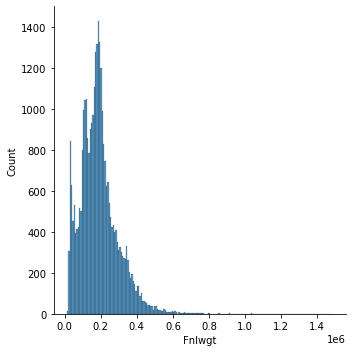

<Figure size 432x288 with 0 Axes>

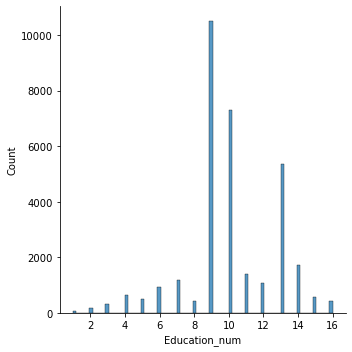

<Figure size 432x288 with 0 Axes>

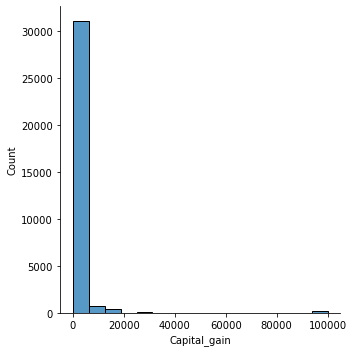

<Figure size 432x288 with 0 Axes>

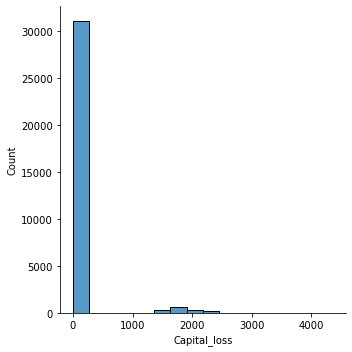

<Figure size 432x288 with 0 Axes>

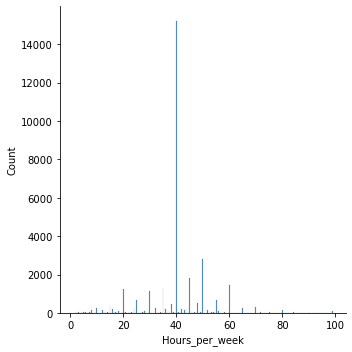

In [378]:
columns=["Age","Fnlwgt","Education_num", "Capital_gain","Capital_loss","Hours_per_week"]

for i in df[columns]:
    plt.figure()
    sns.displot(df[i])

In [379]:
#Plotted the distribution data 

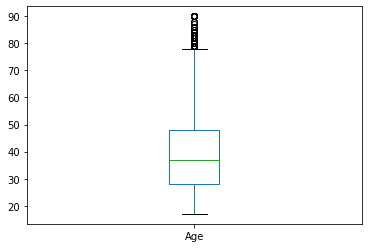

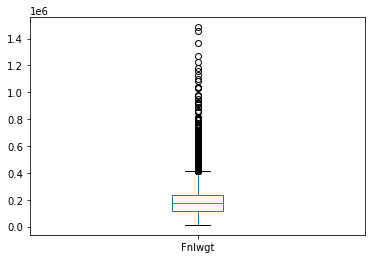

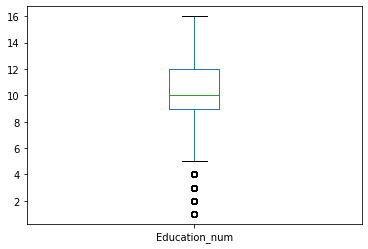

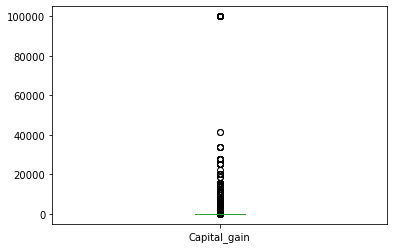

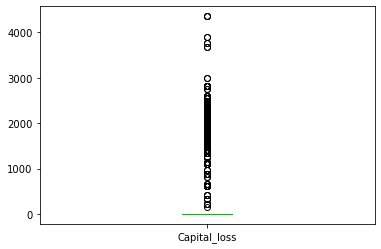

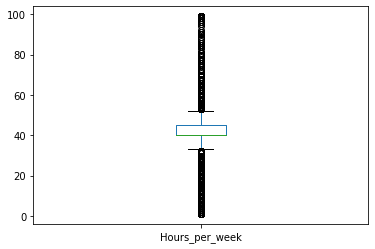

In [380]:
columns=["Age","Fnlwgt","Education_num", "Capital_gain","Capital_loss","Hours_per_week"]

for i in df[columns]:
    plt.figure()
    df[i].plot.box()

In [381]:
#outliers are present in every numerical column

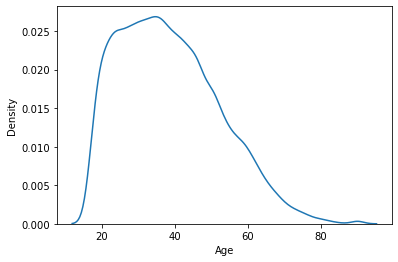

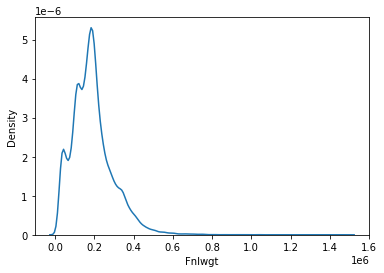

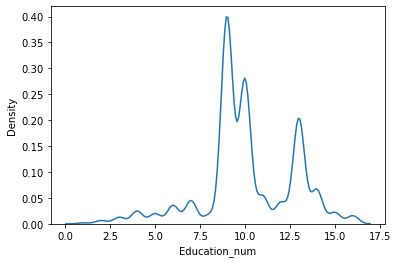

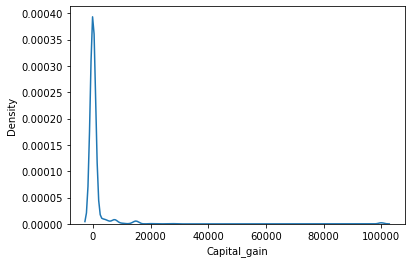

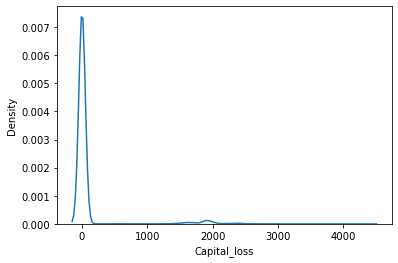

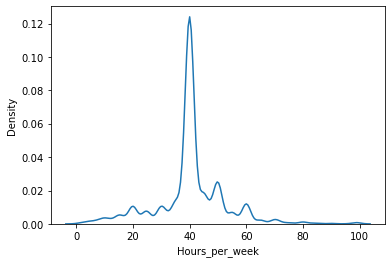

In [382]:
columns=["Age","Fnlwgt","Education_num", "Capital_gain","Capital_loss","Hours_per_week"]

for i in df[columns]:
    plt.figure()
    sns.kdeplot(df[i])

In [383]:
#skewed data

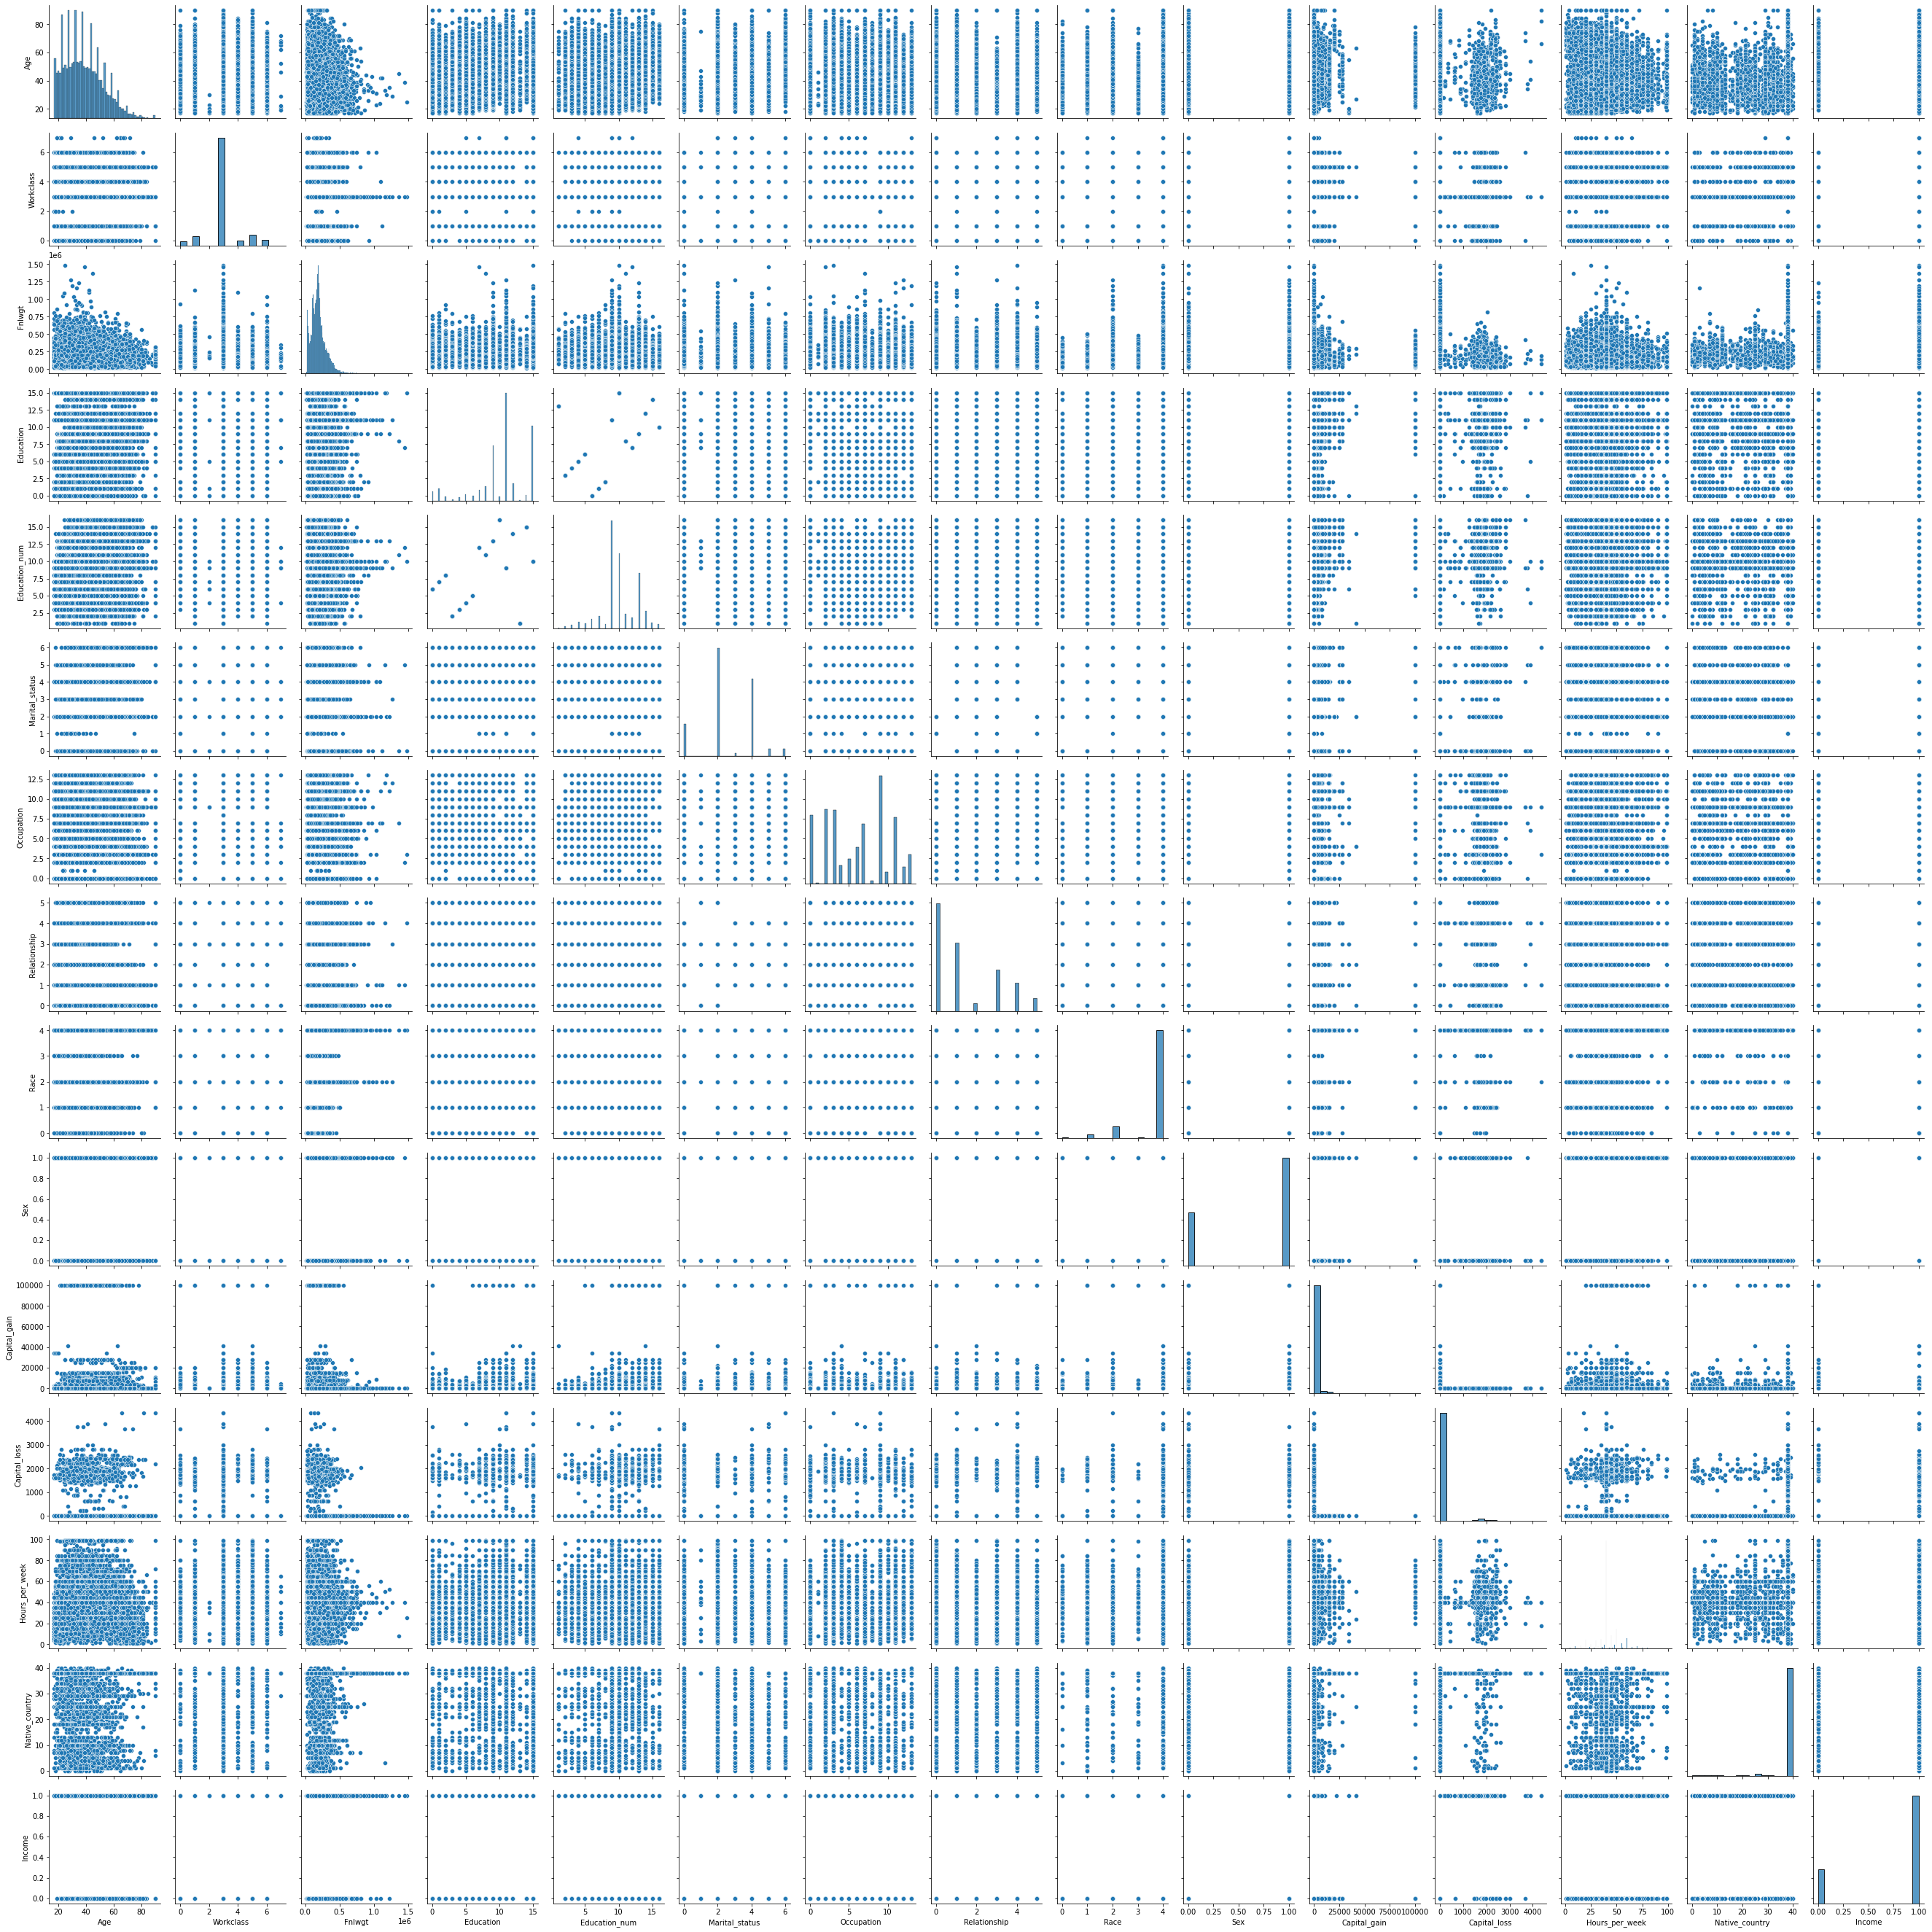

In [384]:
sns.pairplot(df)

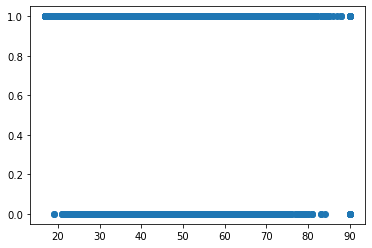

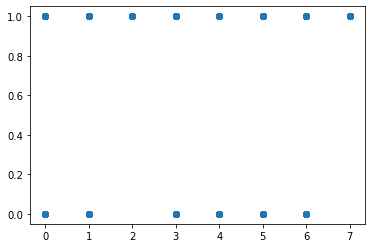

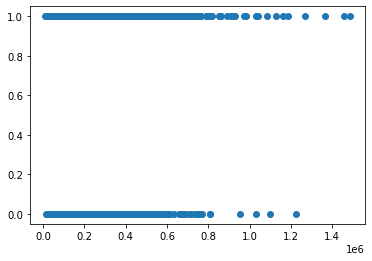

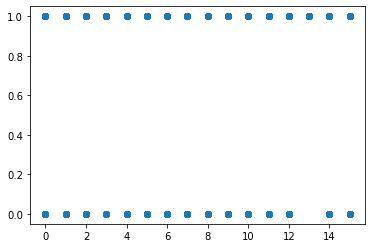

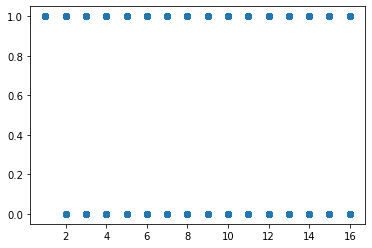

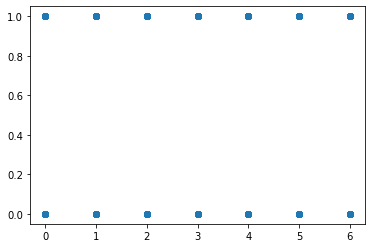

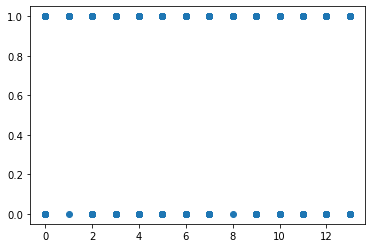

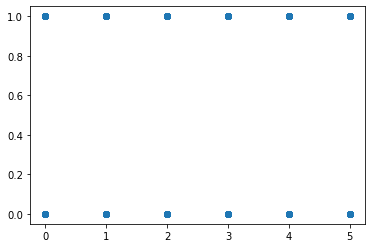

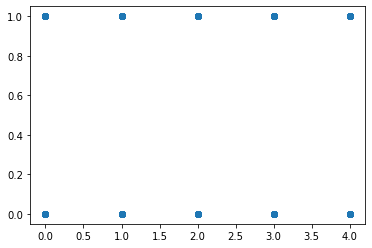

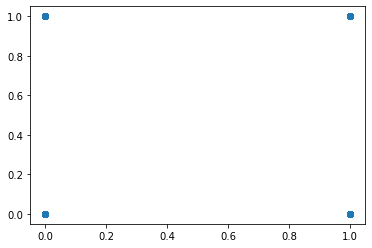

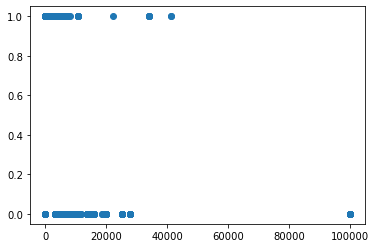

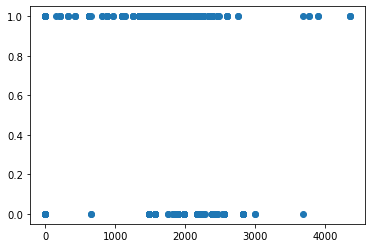

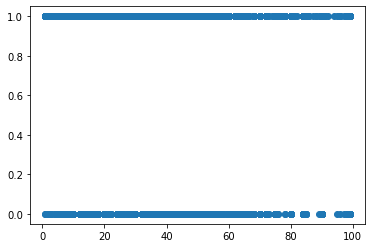

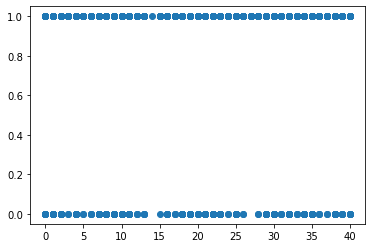

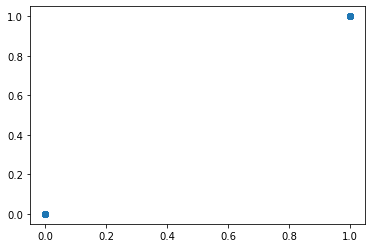

In [385]:
columns=df.columns

for i in df[columns]:
    plt.figure()
    plt.scatter(df[i],df["Income"])

In [386]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income            -1.212383
dtype: float64

In [387]:
from scipy.stats import zscore

In [388]:
df4=df[["Age","Fnlwgt","Education_num", "Capital_gain","Capital_loss","Hours_per_week"]]
z=np.abs(zscore(df4))
df_new=df[(z<3).all(axis=1)]

In [389]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (32560, 15)
shape after          : (29827, 15)
pecentage loss       : 0.08393734643734643


In [390]:
q1=df4.quantile(0.25)
q3=df4.quantile(0.75)
IQR=q3-q1

In [391]:
df_new1=df[~((df4<(q1-1.5*IQR)) |(df4>(q3+1.5*IQR))).any(axis=1)]

In [392]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new1.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

shape before and after
shape before         : (32560, 15)
shape after          : (18997, 15)
pecentage loss       : 0.41655405405405405


In [393]:
#applied IQR and there is 41% data loss so we will go with zscore

In [394]:
df_new.skew()

Age                0.491112
Workclass          0.092296
Fnlwgt             0.634168
Education         -0.942866
Education_num     -0.170298
Marital_status    -0.048971
Occupation         0.005826
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Native_country    -4.335169
Income            -1.330372
dtype: float64

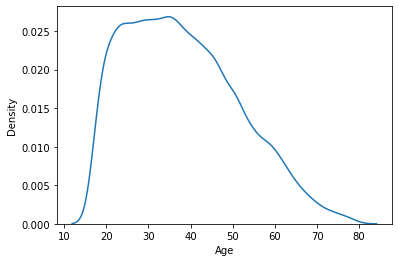

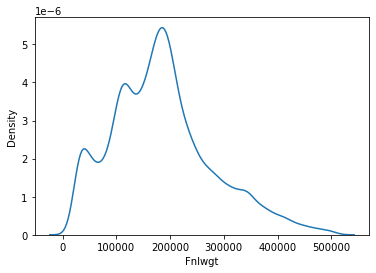

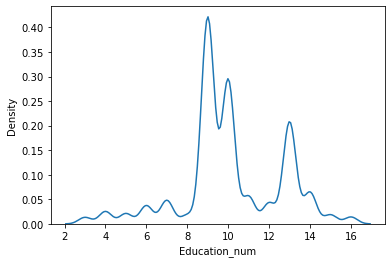

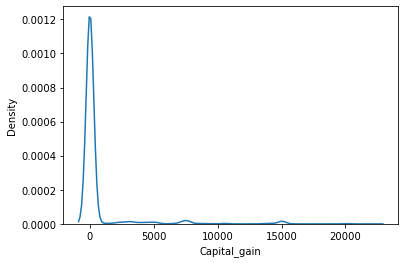

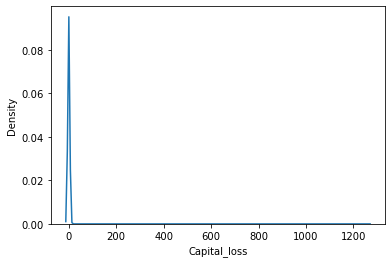

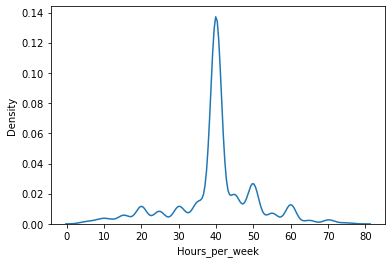

In [395]:
columns=["Age","Fnlwgt","Education_num", "Capital_gain","Capital_loss","Hours_per_week"]

for i in df[columns]:
    plt.figure()
    sns.kdeplot(df_new[i])

In [396]:
x=df_new.drop("Income",axis=1)
y=df_new["Income"]

In [397]:
#seprated the input and output data'

In [398]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

X=pd.DataFrame(x,columns=x.columns)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [399]:
#scalled the data

In [400]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu," on Random sate ",maxRS)

best accuracy is  0.8168510448094759  on Random sate  141


In [401]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=141)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20878, 14)
(8949, 14)
(20878,)
(8949,)


In [402]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score:
0.8114873170186613
[[ 544 1390]
 [ 297 6718]]
              precision    recall  f1-score   support

           0       0.65      0.28      0.39      1934
           1       0.83      0.96      0.89      7015

    accuracy                           0.81      8949
   macro avg       0.74      0.62      0.64      8949
weighted avg       0.79      0.81      0.78      8949



In [403]:
sv=SVC()
sv.fit(x_train,y_train)
pred2=sv.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

accuracy score:
0.8172980221253772
[[ 304 1630]
 [   5 7010]]
              precision    recall  f1-score   support

           0       0.98      0.16      0.27      1934
           1       0.81      1.00      0.90      7015

    accuracy                           0.82      8949
   macro avg       0.90      0.58      0.58      8949
weighted avg       0.85      0.82      0.76      8949



In [404]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred3=rf.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

accuracy score:
0.856855514582635
[[1161  773]
 [ 508 6507]]
              precision    recall  f1-score   support

           0       0.70      0.60      0.64      1934
           1       0.89      0.93      0.91      7015

    accuracy                           0.86      8949
   macro avg       0.79      0.76      0.78      8949
weighted avg       0.85      0.86      0.85      8949



In [405]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred4=ad.predict(x_test)
print("accuracy score:",)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

accuracy score:
0.8673594815063136
[[1139  795]
 [ 392 6623]]
              precision    recall  f1-score   support

           0       0.74      0.59      0.66      1934
           1       0.89      0.94      0.92      7015

    accuracy                           0.87      8949
   macro avg       0.82      0.77      0.79      8949
weighted avg       0.86      0.87      0.86      8949



In [406]:
#APPLYING CROSS VALIDATION
score=cross_val_score(LR,X,y,cv=5)
print(score)
print("/n")
print(score.mean())

[0.79567549 0.80372109 0.81190277 0.79715004 0.79916178]
/n
0.8015222331406328


In [407]:
score=cross_val_score(gnb,X,y,cv=5)
print(score)
print(score.mean())

[0.80506202 0.79433456 0.80637049 0.79530595 0.80335289]
0.8008851836854778


In [408]:
score=cross_val_score(sv,X,y,cv=5)
print(score)
print(score.mean())

[0.81193429 0.80740865 0.80989103 0.80955574 0.80871752]
0.8095014470094435


In [409]:
score=cross_val_score(rf,X,y,cv=5)
print(score)
print(score.mean())

[0.84813946 0.85048609 0.85347863 0.85984912 0.85381391]
0.8531534408870158


In [411]:
score=cross_val_score(ad,X,y,cv=5)
print(score)
print(score.mean())

[0.85517935 0.85836406 0.8650461  0.87057837 0.86404023]
0.8626416246969766


In [413]:
#both the adaboost and random forest classifier are having the same accuracy and same difference in cross validation, so we will choose ada boost

In [414]:
print(confusion_matrix(y_test,pred4))

[[1139  795]
 [ 392 6623]]


In [417]:
#classification matrix

In [418]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66      1934
           1       0.89      0.94      0.92      7015

    accuracy                           0.87      8949
   macro avg       0.82      0.77      0.79      8949
weighted avg       0.86      0.87      0.86      8949



In [419]:
#Classification report

In [420]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [422]:
y_pred_prob=ad.predict_proba(x_test)[:,1]

In [423]:
y_pred_prob

array([0.47958625, 0.50158508, 0.50786486, ..., 0.5052799 , 0.50916653,
       0.50448386])

In [424]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [425]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99276112, 0.99431231,
       1.        ])

In [426]:
tpr

array([0.00000000e+00, 1.42551675e-04, 7.12758375e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [427]:
thresholds

array([1.61274315, 0.61274315, 0.6125231 , ..., 0.44705047, 0.44703886,
       0.44454346])

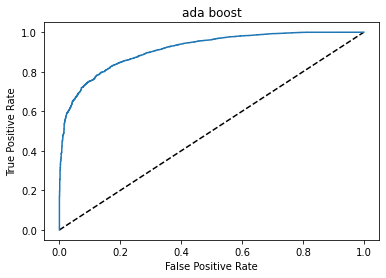

In [428]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="ada boost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ada boost")
plt.show()

In [429]:
#auc roc curve

In [430]:
import joblib
joblib.dump(ad,"Census_income.obj")
print("object of the dataset has been created")

object of the dataset has been created
